# Data Preprocessing

### Import Libraries

In [9]:
import librosa
import librosa.display
from os import listdir
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd

### DataGTZAN music/speech collection

The Dataset collected for the purposes of music/speech discrimination. 
The dataset consists of 120 tracks, each 30 seconds long. 
Each class (music/speech) has 60 examples. 
The tracks are all 22050Hz Mono 16-bit audio files in .wav format.

Source : http://marsyas.info/downloads/datasets.html

In [10]:
CorpusPath = 'Data/gtzan-musicspeech-collection/Corpus/'
Corpusfiles = listdir(CorpusPath)
fn =len(Corpusfiles)

### Explore a shorter audio sample

In [11]:
import random
selected = random.choice(Corpusfiles)
print('Playing the file: '+selected)
ipd.Audio(CorpusPath+selected) 

Playing the file: duke.wav


### Take a look at its Spectrogram

In [12]:
x, Fs = librosa.load(CorpusPath+selected)
X = librosa.stft(x)
# Xdb = librosa.amplitude_to_db(abs(X))
# plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=Fs, x_axis='time', y_axis='hz')

### Import Basic Labeling Data

This was manually labels by me. Each audio clip is classified into Music/Speech. A '1' represents Music and '0' represents Speech.

In [13]:
import pandas as pd
basicdata = pd.read_csv('Data/gtzan-musicspeech-collection/datalables.txt')
basicdata.head()
basicdata.shape

(128, 2)

In [14]:
n_mfcc = 120
%store n_mfcc
CHUNK = 1024
%store CHUNK
frame = CHUNK*4
mfcccol = ['Filename']+['MFC'+str(i) for i in range(n_mfcc)]
# melcol = ['Filename']+['Mel'+str(j) for j in range(128)]

mfccdata = pd.DataFrame(columns=mfcccol)
# meldata = pd.DataFrame(columns=melcol)

Stored 'n_mfcc' (int)
Stored 'CHUNK' (int)


### Compute the MFCC and Mel Coefficients

In [15]:
import numpy as np
i=0
for file in Corpusfiles:
    print(str(fn-i)+ ' to go', end='\r', flush=True)
    i+=1
    x, Fs = librosa.load(CorpusPath+file)
    nS = len(x)
    npads = int(np.ceil(nS/frame))*frame-nS
    x = np.append(x, np.zeros(npads))
    segments = np.array_split(x, int(np.ceil(nS/frame)))
    for segment in segments:
        MFCCS = np.mean(librosa.feature.mfcc(y=segment, sr=Fs, n_mfcc=n_mfcc).T,axis=0)
        #     Mels   = np.mean(librosa.feature.melspectrogram(x, sr=Fs).T,axis=0)
        mfcrow   = [file]+list(MFCCS)
        mfccdata.loc[len(mfccdata)] = mfcrow
        #     melrow   = [file]+list(Mels)
        #     meldata.loc[len(meldata)] = melrow

In [29]:
mfccdata = mfccdata.sort_values(['Filename'])
# meldata = meldata.sort_values(['Filename'])

In [30]:
mfccdata

,Filename,MFC0,MFC1,MFC2,MFC3,MFC4,MFC5,MFC6,MFC7,MFC8,...,MFC110,MFC111,MFC112,MFC113,MFC114,MFC115,MFC116,MFC117,MFC118,MFC119
9394,acomic.wav,-244.888291,147.140246,-2.157622,38.557802,5.934628,-22.888103,2.022610,15.222069,-20.402546,...,-0.308241,-0.130625,1.109991,1.929946,0.099788,0.360612,1.452474,-1.209755,0.191095,0.750577
9391,acomic.wav,-177.170615,114.843384,12.602753,22.761663,-40.683799,-25.517929,27.829481,-6.830150,-14.315801,...,-0.651419,-0.633716,-1.099330,-0.399229,-0.220948,0.101460,0.135614,-0.691031,0.708690,1.331714
9390,acomic.wav,-224.904691,136.920940,12.481108,25.593671,-30.111391,-15.560227,1.127804,-14.308211,-7.836054,...,2.728266,1.518327,0.567794,-0.008723,0.170642,1.697737,-0.510584,-0.083602,0.448363,-0.062339
9389,acomic.wav,-335.988065,76.736559,-0.759291,18.699235,9.448061,9.593583,-7.317364,-7.378796,-1.561691,...,-0.340887,0.371904,2.320038,1.045868,0.258634,0.811898,0.068471,0.836147,0.430821,0.794732
9388,acomic.wav,-305.799599,71.588076,-5.056554,14.517703,-5.760437,9.603750,-10.142493,-7.633101,-5.253357,...,1.555748,3.729800,1.521215,0.434817,0.521091,-0.342129,1.037984,0.158231,-0.592616,0.100482
9387,acomic.wav,-292.958622,100.571331,-10.706616,17.172791,-6.751964,1.333516,11.245748,-8.326498,-17.345166,...,0.806938,0.791819,0.974844,1.384320,1.518962,0.199661,-0.454525,1.036600,-0.138154,0.225426
9386,acomic.wav,-223.787971,130.882719,-10.873027,10.551415,-27.511887,-17.380519,10.145639,9.997283,-43.573276,...,0.801681,-0.725931,-0.164249,1.638317,1.891894,1.168990,1.971574,1.929299,2.558036,1.602104
9385,acomic.wav,-255.056179,128.457771,18.201854,20.268238,-6.206085,-1.303635,9.175441,2.550709,-14.486698,...,0.307959,-0.410884,0.412690,1.409549,1.108862,0.209426,0.912423,1.510281,1.730052,-0.746170
9313,acomic.wav,-208.402446,107.885087,-12.044134,-6.359881,-2.122072,-1.733834,-19.267756,-13.479453,-6.941126,...,0.228201,1.001522,1.412787,-0.997958,-0.682618,-0.155647,0.707694,0.465635,1.491998,1.164015
9384,acomic.wav,-251.308345,129.338329,-5.432785,39.642949,22.900741,3.883863,6.999436,-2.577721,-14.534876,...,1.821097,0.758299,0.845969,0.588432,0.602676,0.542287,1.796483,1.707231,1.869486,0.477880


In [31]:
# meldata.head()

### Combine All Features

In [32]:
masterdata = pd.merge(basicdata, mfccdata, on='Filename')
# masterdata = pd.merge(masterdata, meldata, on='Filename')

In [33]:
masterdata.head()

,Filename,Music,MFC0,MFC1,MFC2,MFC3,MFC4,MFC5,MFC6,MFC7,...,MFC110,MFC111,MFC112,MFC113,MFC114,MFC115,MFC116,MFC117,MFC118,MFC119
0,acomic2.wav,0,-345.597066,103.399304,35.140964,16.748487,15.462267,16.402948,8.567164,3.318291,...,0.328724,1.055132,1.687397,-1.806953,0.244572,0.421892,1.294324,-1.100634,-0.715230,1.461877
1,acomic2.wav,0,-382.457832,85.852747,36.040531,38.939125,33.333100,10.069840,-7.284563,8.995387,...,1.942045,1.041355,0.206640,0.787947,-0.194267,-1.232325,-0.536288,-0.625269,1.335180,1.277035
2,acomic2.wav,0,-297.419149,161.953856,10.462801,24.205121,-9.809155,-4.135424,15.264208,-4.814275,...,1.978528,1.593926,2.136231,0.928229,1.131446,1.133482,1.387579,-0.286221,1.189604,2.334674
3,acomic2.wav,0,-307.891778,169.710288,9.897070,27.149934,-23.329206,-11.718751,9.921664,13.524902,...,0.235181,-0.306842,-0.587077,0.043087,-0.360294,0.119188,0.251351,-0.792725,0.826783,1.522919
4,acomic2.wav,0,-337.524240,116.644971,27.881735,21.210428,10.401353,12.144045,0.910478,9.666151,...,1.154279,1.818090,1.105393,0.438976,0.855631,-0.714849,0.038656,0.606880,0.766579,1.876492


### Normalise All Features

In [34]:
from sklearn.preprocessing import StandardScaler

x = masterdata.iloc[:,2:].values 
x_scaled= StandardScaler().fit_transform(x)
normfeatures = pd.DataFrame(x_scaled)

In [35]:
normfeatures.columns = [x+'_n' for x in list(masterdata.columns[2:])]

In [36]:
normfeatures.head()

,MFC0_n,MFC1_n,MFC2_n,MFC3_n,MFC4_n,MFC5_n,MFC6_n,MFC7_n,MFC8_n,MFC9_n,...,MFC110_n,MFC111_n,MFC112_n,MFC113_n,MFC114_n,MFC115_n,MFC116_n,MFC117_n,MFC118_n,MFC119_n
0,-1.327093,-0.087240,1.659474,-0.606739,0.588554,1.001064,1.189150,0.005809,-1.250788,-0.493938,...,-0.047322,0.694479,1.049471,-1.634836,0.413203,0.182472,0.524803,-1.081920,-0.009112,1.238435
1,-1.730751,-0.520124,1.689155,0.650453,1.705698,0.593754,-0.197130,0.543215,0.333318,-0.689981,...,1.178125,0.684231,-0.175246,0.537079,0.093287,-1.084258,-0.704094,-0.758551,1.189464,1.102523
2,-0.799503,1.357339,0.845226,-0.184290,-0.991218,-0.319849,1.774826,-0.764038,-0.343122,-0.504590,...,1.205837,1.095209,1.420697,0.654494,1.059741,0.727377,0.587405,-0.527911,1.104367,1.880192
3,-0.914187,1.548695,0.826560,-0.017454,-1.836385,-0.807566,1.307605,0.971989,0.135050,0.477194,...,-0.118375,-0.318495,-0.831720,-0.086364,-0.027749,-0.049327,-0.175349,-0.872463,0.892278,1.283318
4,-1.238689,0.239539,1.419958,-0.353951,0.272185,0.727156,0.519550,0.606711,-0.153640,0.117840,...,0.579754,1.261931,0.568102,0.244993,0.858671,-0.687997,-0.318132,0.079625,0.857086,1.543296


In [37]:
masterdata = pd.concat([basicdata, normfeatures], axis=1)

### Create A Master Dataset

In [38]:
masterdata.head()

,Filename,Music,MFC0_n,MFC1_n,MFC2_n,MFC3_n,MFC4_n,MFC5_n,MFC6_n,MFC7_n,...,MFC110_n,MFC111_n,MFC112_n,MFC113_n,MFC114_n,MFC115_n,MFC116_n,MFC117_n,MFC118_n,MFC119_n
0,acomic2.wav,0.0,-1.327093,-0.087240,1.659474,-0.606739,0.588554,1.001064,1.189150,0.005809,...,-0.047322,0.694479,1.049471,-1.634836,0.413203,0.182472,0.524803,-1.081920,-0.009112,1.238435
1,acomic.wav,0.0,-1.730751,-0.520124,1.689155,0.650453,1.705698,0.593754,-0.197130,0.543215,...,1.178125,0.684231,-0.175246,0.537079,0.093287,-1.084258,-0.704094,-0.758551,1.189464,1.102523
2,allison.wav,0.0,-0.799503,1.357339,0.845226,-0.184290,-0.991218,-0.319849,1.774826,-0.764038,...,1.205837,1.095209,1.420697,0.654494,1.059741,0.727377,0.587405,-0.527911,1.104367,1.880192
3,amal.wav,0.0,-0.914187,1.548695,0.826560,-0.017454,-1.836385,-0.807566,1.307605,0.971989,...,-0.118375,-0.318495,-0.831720,-0.086364,-0.027749,-0.049327,-0.175349,-0.872463,0.892278,1.283318
4,austria.wav,0.0,-1.238689,0.239539,1.419958,-0.353951,0.272185,0.727156,0.519550,0.606711,...,0.579754,1.261931,0.568102,0.244993,0.858671,-0.687997,-0.318132,0.079625,0.857086,1.543296


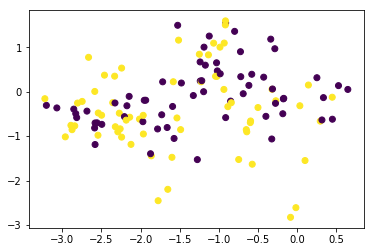

In [39]:
plt.scatter(masterdata.MFC0_n, masterdata.MFC1_n, c = masterdata.Music)

In [40]:
masterdata.to_csv('Data/MasterData.csv', index=False)

In [41]:
# Separate Features and Label
x = masterdata.loc[:, normfeatures.columns].values
y = masterdata.loc[:,['Music']].values

### Perform PCA To Identfie Relevant Columns

In [42]:
from sklearn.decomposition import PCA

n_pca = 50
pca = PCA(n_components=n_pca)
PCs = pca.fit_transform(x)
principalDf = pd.DataFrame(data = PCs, columns = ['PCA'+str(i) for i in range(n_pca)])
PCDf = pd.concat([principalDf, masterdata[['Music']]], axis = 1)
PCDf['Filename'] = basicdata['Filename']

In [43]:
PCDf

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,Music,Filename
0,-2.030756,0.298393,2.410705,-1.259754,0.557034,1.659335,0.534421,0.661816,1.077371,-1.568282,...,0.041142,-0.725291,-0.190116,1.537203,0.027315,-0.355510,-0.472451,-0.093764,0.0,acomic2.wav
1,-1.241337,-1.305191,1.084196,-1.275768,1.125181,1.850957,-0.378813,1.111644,0.162768,-2.410106,...,-0.057103,-0.247802,0.337845,0.055304,0.004282,-0.375611,-0.251102,0.516212,0.0,acomic.wav
2,-1.885741,-1.385656,3.625076,-2.548224,0.487898,2.036212,-0.485578,-0.144908,1.779776,-2.881661,...,-0.700474,-0.925103,0.017816,0.718728,0.325288,0.115132,-0.074482,0.242194,0.0,allison.wav
3,0.581939,0.102796,1.860682,-0.226688,-0.363985,0.570060,-0.541838,0.462951,-1.290648,0.619555,...,1.777971,-0.402161,-0.689660,-0.209125,0.953793,0.163439,0.581246,-0.662730,0.0,amal.wav
4,-1.241067,-1.694451,1.750074,-0.629769,0.122588,0.119682,0.566075,0.699973,0.183208,-1.012157,...,-0.383655,-1.066031,-0.757681,0.477451,0.067387,-0.247654,0.099614,0.068355,0.0,austria.wav
5,-0.764479,-0.073300,1.313839,-1.168372,-1.169102,3.379430,0.563423,-1.041088,-0.307222,-1.811954,...,0.346736,-1.507577,-0.515235,0.168566,0.473075,0.145940,0.093346,-0.066948,1.0,bagpipe.wav
6,-2.416678,-0.336402,2.659879,-1.314551,1.972744,-0.347006,0.942500,1.351211,1.836641,-2.460817,...,0.369622,-1.205914,0.515632,2.303740,0.250008,-0.212149,-1.493850,-0.913560,1.0,ballad.wav
7,-1.347329,-0.760909,1.240367,-1.607236,0.855168,1.626439,0.445647,0.730211,-0.080106,-0.440835,...,0.004290,0.053175,-0.053922,-0.022121,0.001351,0.754344,-0.421926,0.758124,1.0,bartok.wav
8,-0.459014,-1.623957,2.659173,-3.175659,1.344785,1.814539,-0.157470,2.762645,2.239687,-2.170403,...,-0.056452,0.143558,-0.344266,-0.808984,0.034320,-0.162062,-0.259958,0.066447,0.0,bathroom1.wav
9,-0.679378,-1.014823,3.770833,-1.295396,1.156736,0.710767,-0.077725,1.605609,2.114115,-1.982295,...,-0.284105,-0.465206,-0.417529,-0.150503,-0.899164,-1.179890,-0.644684,0.298291,1.0,beatles.wav


### Explore the Variance Ration to Determine Relevant Features

array([0.0411405 , 0.07990204, 0.11360662, 0.1460447 , 0.17623246,
       0.20504423, 0.23217444, 0.25850466, 0.28393816, 0.30646141,
       0.3280479 , 0.34873517, 0.36761439, 0.38538873, 0.40134724,
       0.41657377, 0.43128691, 0.44519822, 0.45846245, 0.47115211,
       0.48343737, 0.49556788, 0.50703587, 0.51832125, 0.52921797,
       0.53969171, 0.54996076, 0.55974001, 0.56942614, 0.5790073 ,
       0.58851573, 0.5977245 , 0.60678938, 0.61553262, 0.62414722,
       0.63269718, 0.64110901, 0.64939536, 0.65738765, 0.66524539,
       0.67304354, 0.68066534, 0.68819649, 0.69551766, 0.70273132,
       0.70979897, 0.71673439, 0.72362557, 0.7303507 , 0.73688881])

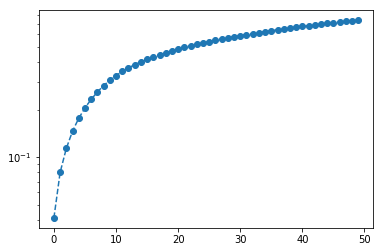

In [44]:
plt.semilogy(pca.explained_variance_ratio_.cumsum(), '--o')
# pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

In [45]:
import pickle
pickle.dump(pca, open('PickledModels/'+pca.__class__.__name__, 'wb'))

### The analysis shows how each component captures of all information

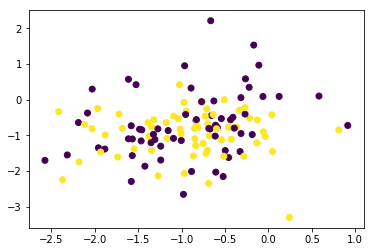

In [46]:
plt.scatter(PCDf.PCA0, PCDf.PCA1, c = PCDf.Music)

In [47]:
PCDf.to_csv('Data/PrincipalComponentData.csv', index=False)